# MAPAS


In [ ]:
# Dar acceso a los archivos de Drive:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
# Instalar las librerías que no se encuentran en el sistema
!pip install wrf-python # instalar wrf-python
!pip install pyproj==1.9.6
!apt-get -qq install libgeos-dev
!pip install basemap
!pip install netCDF4

In [ ]:
# Llarmar las librerías para ser usadas en el código
from netCDF4 import Dataset
import numpy
import wrf
import pandas 
from mpl_toolkits import basemap
import matplotlib.pyplot

In [ ]:
# Abrir el archivo que vamos a usar para graficar.

datos = Dataset("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/datos_taller_wrf_FIRE.nc") # Escenario FIRE
#datos = Dataset("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/datos_taller_wrf_NOFIRE.nc") # Escenario NOFIRE

# Mapa Distribución Espacial del Promedio del Mes de Simulación de PM2.5 en Bogotá.

In [ ]:
# Llamar el archivo de excel y la hoja donde están los datos de ubicación de las estaciones de monitoreo
Estaciones = pandas.read_excel('/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/EstacionesBogota.xlsx', sheet_name='Ubic_Estaciones', index_col=False, header=0)
UBI_ESTACIONES = Estaciones.set_index('ESTACIONES')
print(UBI_ESTACIONES)

#******************************
# Modifique el nombre de la estación tal cual esta en la tabla de excel anterior dentro de las comillas.
nombre_estacion = "Carvajal"
#*****************************

latitud = UBI_ESTACIONES.loc[nombre_estacion]['LATITUD']
longitud = UBI_ESTACIONES.loc[nombre_estacion]['LONGITUD']

print(latitud, longitud)

            NUMERO   LATITUD   LONGITUD  XLAT_d03  XLONG_d03
ESTACIONES                                                  
Carvajal        CV  4.595616 -74.148583      49.0       48.0
CentAltoRen     CA  4.658467 -74.083966      52.0       51.0
Guaymaral       GU  4.783756 -74.044183      56.0       52.0
Kennedy         KE  4.621667 -74.161333      50.0       48.0
LasFerias       LF  4.690700 -74.082483      53.0       51.0
PuentAranda     PA  4.631767 -74.117483      51.0       50.0
SanCrist        SC  4.572553 -74.083813      48.0       51.0
Suba            SU  4.761247 -74.093461      55.0       50.0
Tunal           TU  4.576225 -74.130955      49.0       49.0
Usaquen         US  4.710350 -74.030417      54.0       53.0
Movil7ma        M7  4.645361 -74.061679      51.0       52.0
Fontibon        FO  4.670121 -74.141361      52.0       49.0
MinAmb          MA  4.625385 -74.067185      50.0       51.0
4.595616 -74.148583


In [ ]:
print(datos.variables["PM2_5_DRY"].dimensions) # la dimensión bottom_top solo tiene una capa, debemos colocar un cero para esa dimensión
#datos.variables["PM2_5_DRY"][0:816,0,0:132,0:132]

print(datos.variables["PM2_5_DRY"].shape)
print(datos.variables["PM2_5_DRY"].units)

('Time', 'bottom_top', 'south_north', 'west_east')
(817, 1, 132, 132)
ug m^-3


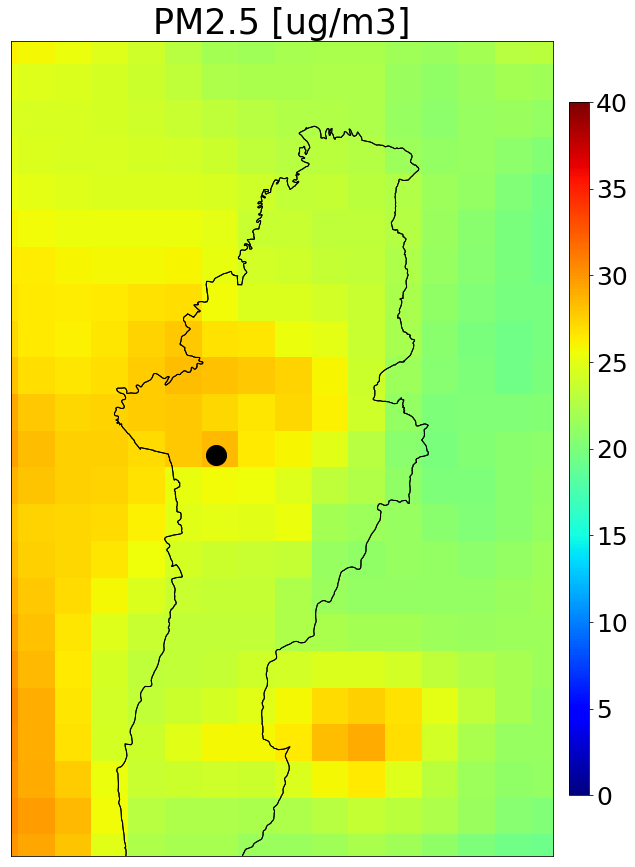

In [ ]:
m = basemap.Basemap(llcrnrlon= -74.3,
                  llcrnrlat= 4.3,
                  urcrnrlon= -73.9,
                  urcrnrlat= 4.9,
                  projection= 'merc',
                  resolution= 'l')

lons, lats = numpy.meshgrid(datos.variables['XLONG'][0,0,:], datos.variables['XLAT'][0,:,0])
x, y = m(lons, lats)

df = numpy.mean(datos.variables['PM2_5_DRY'][0:816,0,0:132,0:132], axis=0)    

fig = matplotlib.pyplot.subplots(figsize=(15,15))
m.pcolormesh(x, y, df[0:132,0:132], cmap='jet', vmin=0.0, vmax=40)

cb = matplotlib.pyplot.colorbar(shrink=0.85, pad=0.02, aspect=35)
cb.ax.tick_params(labelsize=25)

matplotlib.pyplot.title("PM2.5 [ug/m3]", size = 35)

m.readshapefile("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/Colombia_Depart", "colombia", drawbounds = True, color= "black", linewidth=1)

# La unica diferencia del script anterior son las siguientes dos líenas donde se coloca el punto de ubicación de la estación de monitoreo.
px,py = m(longitud, latitud)
m.plot(px, py, 'o', markersize=20, color ='black')

matplotlib.pyplot.savefig("/gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/Mapa_PM25_Bogota_Fire.png", dpi=300, bbox_inches='tight')


# Mapa Distribución Espacial del Promedio de Vientos del Mes de Simulación en Bogotá.


In [ ]:
u = wrf.getvar(datos, "ua", units="m s-1", timeidx=wrf.ALL_TIMES, method="cat")[0:816,0:132,0:132]
v = wrf.getvar(datos, "va", units="m s-1", timeidx=wrf.ALL_TIMES, method="cat")[0:816,0:132,0:132]
print(u.shape, v.shape)

(816, 132, 132) (816, 132, 132)


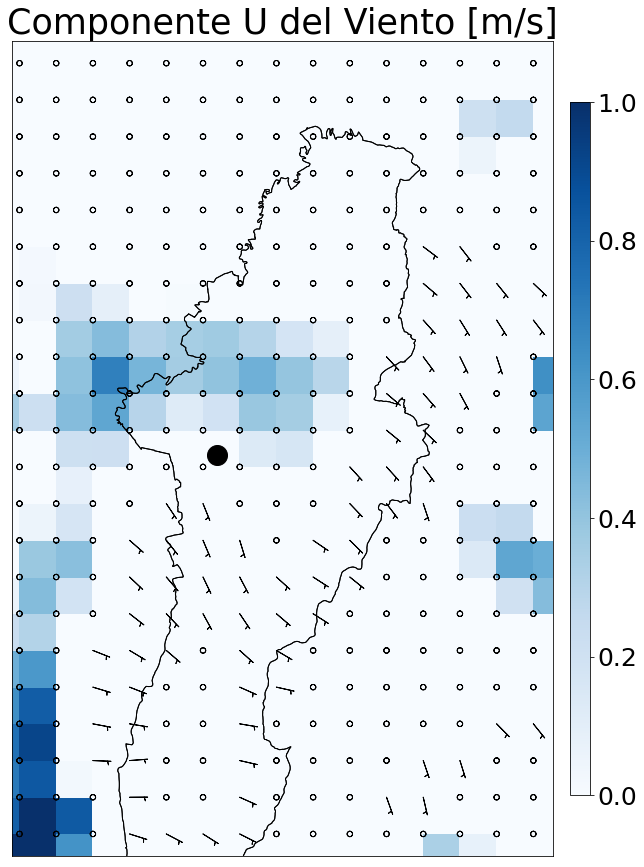

In [ ]:
m = basemap.Basemap(llcrnrlon= -74.3,
                  llcrnrlat= 4.3,
                  urcrnrlon= -73.9,
                  urcrnrlat= 4.9,
                  projection= 'merc',
                  resolution= 'l')

lons, lats = numpy.meshgrid(datos.variables['XLONG'][0,0,:], datos.variables['XLAT'][0,:,0])
x, y = m(lons, lats)

# En colores azules se grafica 
df = numpy.mean(u[0:816,0:132,0:132], axis=0)

fig = matplotlib.pyplot.subplots(figsize=(15,15))
m.pcolormesh(x, y, df[0:132,0:132], cmap='Blues', vmin=0.0, vmax=1)

cb = matplotlib.pyplot.colorbar(shrink=0.85, pad=0.02, aspect=35)
cb.ax.tick_params(labelsize=25)

matplotlib.pyplot.title("Componente U del Viento [m/s]", size = 35)

m.readshapefile("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/Colombia_Depart", "colombia", drawbounds = True, color= "black", linewidth=1)

# La unica diferencia del script anterior son las siguientes dos líenas donde se coloca el punto de ubicación de la estación de monitoreo.
px,py = m(longitud, latitud)
m.plot(px, py, 'o', markersize=20, color ='black')

# Estas lineas permiten graficar las barras que indican la dirección y velocidad del viento.
ui = numpy.mean(u[0:816,0:132,0:132], axis=0)
vi = numpy.mean(v[0:816,0:132,0:132], axis=0)
Q = m.barbs(x[::1,::1], y[::1,::1], wrf.to_np(ui[::1, ::1]), wrf.to_np(vi[::1, ::1]), length=6, flagcolor='black')
#Q = m.quiver(x[::1,::1], y[::1,::1], wrf.to_np(ui[::1, ::1]), wrf.to_np(vi[::1, ::1]), units='x', pivot='mid')#, scale_units='xy', scale=1e100)


matplotlib.pyplot.savefig("/gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/Mapa_Vientos.png", dpi=300, bbox_inches='tight')